## Imports

In [7]:
from pprint import pprint
import pandas as pd
from aircraftdetective.calculations import engines
from aircraftdetective.utility import tabular

## Calculations

A dataset of engines with both takeoff and cruise TSFC values is available at the **"Aircraft Detective" Dataset"** on Zenodo at doi:[10.5281/zenodo.14382100](https://doi.org/10.5281/zenodo.14382100)

In [2]:
dict_calibration = engines.determine_takeoff_to_cruise_tsfc_ratio(
    path_excel_engine_data_for_calibration="https://zenodo.org/records/14382101/files/Engine%20Database%20(TSFC%20Data).xlsx?download=1"
)
pprint(dict_calibration)

{'df_engines':    Engine Identification       TSFC (cruise)      TSFC (takeoff)
0                  AI-25   22.51881666666667  16.145566666666664
1                 ATF3-6               22.83               14.33
2                ATF3-6A   23.51021111111111  14.247754444444444
3               BR715-55               17.52                10.5
4               CF34-3B1               19.49                 9.8
..                   ...                 ...                 ...
94            Trent 1000              14.325              13.787
95              V2500-A1   16.47857388888889   9.906972222222223
96              V2522-A5  16.279434444444448   9.615344444444446
97              V2525-D5  16.279434444444448  10.198599999999999
98              V2533-A5  16.279434444444448  10.490227777777775

[99 rows x 3 columns],
 'pol_linear_fit': Polynomial([19.73263263,  4.2917748 ], domain=[ 7.72047244, 18.37173857], window=[-1.,  1.], symbol='x'),
 'pol_quadratic_fit': Polynomial([20.28613569,  4.287678

In [9]:
tabular.export_typed_dataframe_to_excel(
    df=dict_calibration['df_engines'],
    path="engine_calibration.xlsx",
)

/Users/michaelweinold/github/aircraftdetective/src/aircraftdetective/calculations/engines.py:209: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


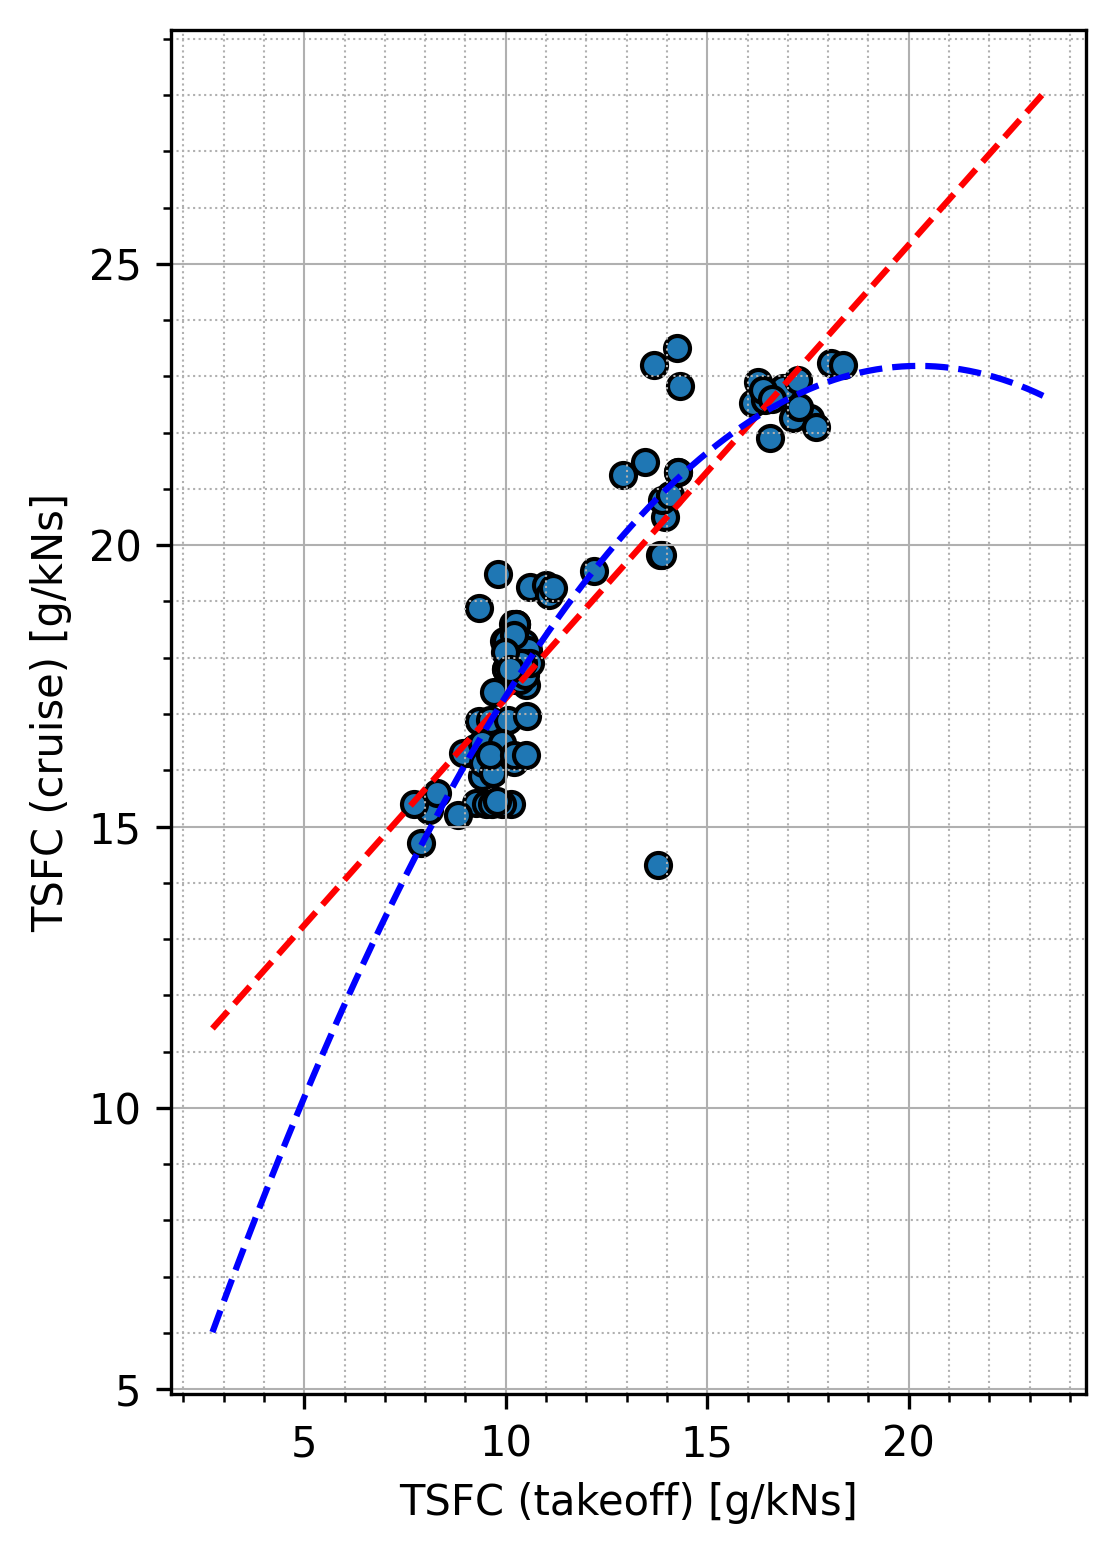

In [3]:
engines.plot_takeoff_to_cruise_tsfc_ratio(
    df_engines=dict_calibration['df_engines'],
    linear_fit=dict_calibration['pol_linear_fit'],
    polynomial_fit=dict_calibration['pol_quadratic_fit'],
)

The ICAO Engine Emissions Databank provides a comprehensive database of aircraft engine emissions, including TSFC (takeoff) values for various engines. It is available at the [EASA Environmental website](https://www.easa.europa.eu/en/domains/environment/icao-aircraft-engine-emissions-databank).

In [6]:
df_scaled = engines.scale_engine_data_from_icao_emissions_database(
    path_excel_engine_data_icao_in="https://www.easa.europa.eu/en/downloads/131424/en",
    scaling_polynomial=dict_calibration['pol_quadratic_fit'],
)
df_scaled

,Engine Identification,Final Test Date,Fuel Flow (takeoff),Fuel Flow (climbout),Fuel Flow (approach),Fuel Flow (idle),B/P Ratio,Pressure Ratio,Rated Thrust,TSFC (takeoff),TSFC (cruise)
0,AE3007A,1995.0,0.377,0.315,0.117,0.049,5.23,18.08,33.73,11.17699377408835,18.586108406875073
1,AE3007A1,1999.75,0.3826,0.318,0.113,0.0461,4.77,17.97,34.91,10.959610426811803,18.363047179281892
2,AE3007A1 series,1995.0,0.38,0.319,0.117,0.05,4.76,17.81,33.73,11.26593536910762,18.675850785971647
3,AE3007A1/1,1999.75,0.3805,0.3163,0.1125,0.0459,4.77,17.9,34.74,10.95279217040875,18.35596542224979
4,AE3007A1/3,1999.75,0.3589,0.2999,0.1077,0.0449,4.81,17.22,33.05,10.859304084720122,18.258340405273373
...,...,...,...,...,...,...,...,...,...,...,...
479,V2530-A5,1992.0,1.331,1.077,0.377,0.138,4.54,32.1,133.4,9.97751124437781,17.28947569603808
480,V2530-A5 SelectOne™ Upgrade Package,2009.0,1.325,1.078,0.387,0.145,4.6,32.0,133.0,9.962406015037594,17.272121935849096
481,V2531-E5,2009.0,1.329,1.079,0.391,0.144,4.52,32.3,134.8,9.859050445103856,17.152696982705365
482,V2533-A5,1992.0,1.426,1.1447,0.3901,0.1363,4.46,33.44,140.56,10.14513375071144,17.480338723125705


In [8]:
tabular.export_typed_dataframe_to_excel(
    df=df_scaled,
    path="calibrated_engine_data_icao.xlsx",
)